In [540]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [541]:
import numpy as np
import pandas as pd

In [542]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [543]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [544]:
engine = create_engine("sqlite:///C:/Users/Erik/Desktop/SMDA-HW/10-Advanced-Data-Storage-and-Retrieval/Instructions/Resources/hawaii.sqlite")

In [545]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [547]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [548]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [549]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [550]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [551]:
#Set up Inspector to be able to view columns
inspector=inspect(engine)

In [552]:
#Variable Types for the Measurement Class
columns=inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [553]:
#Sample from query of Measurement
engine.execute('Select * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [554]:
#Perform query to identify last date for data
#split string of the last date to use as variable for last_date
#use timedelta to get date for one year prior to the last_date value
last_date_query=session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
a,b,c=last_date_query.split("-")
last_date=dt.date(int(a), int(b), int(c))

year_prior=last_date-dt.timedelta(days=365)

print(last_date.strftime("%Y-%m-%d"))
print(year_prior.strftime("%Y-%m-%d"))

2017-08-23
2016-08-23


In [555]:
#query precipitation for all dates after the year_prior date to get the last 12 months of data
precipitation=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_prior).all()
precipitation

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [556]:
#convert precipitation data into DataFrame
df=pd.DataFrame(precipitation, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)
df.fillna(0, inplace=True)

df.head()

precipitation
date                     
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00

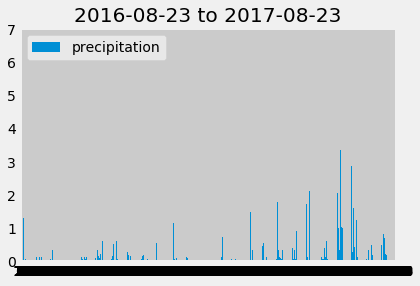

In [557]:
#Plot precipitation for last year
df.plot.bar(xticks=[], use_index=False)
plt.xlabel="Date"
plt.ylabel="Precipitation"
plt.title("2016-08-23 to 2017-08-23")
plt.show()

#I can't figure out how to remove the x tick label and it is pissing me off!

In [558]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe(percentiles=[.25, .50, .75])

precipitation
count    2230.000000
mean        0.160664
std         0.442067
min         0.000000
25%         0.000000
50%         0.010000
75%         0.110000
max         6.700000

In [561]:
# Design a query to show how many stations are available in this dataset?
stations_count  = session.query(func.count(Station.id)).all()

stations_count

[(9)]

In [527]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [528]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

sel=[func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

most_active = session.query(*sel).\
    filter(Measurement.station=="USC00519281").all()

most_active

[(54.0, 85.0, 71.66378066378067)]

In [529]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [530]:
last_date_query2=session.query(Measurement.date).\
    filter(Measurement.station=="USC00519281").\
    order_by(Measurement.date.desc()).first().date
   
a2,b2,c2=last_date_query.split("-")
last_date2=dt.date(int(a2), int(b2), int(c2))

year_prior2=last_date2-dt.timedelta(days=365)

print(last_date2.strftime("%Y-%m-%d"))
print(year_prior2.strftime("%Y-%m-%d"))


2017-08-23
2016-08-23


In [531]:
greatest_number=session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station=="USC00519281").\
    filter(Measurement.date >= year_prior2).all()

greatest_number

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [532]:
df2=pd.DataFrame(greatest_number, columns=['date', 'tobs'])
df2.set_index('date', inplace=True)
df2.fillna(0, inplace=True)

df2.head()

tobs
date            
2016-08-23  77.0
2016-08-24  77.0
2016-08-25  80.0
2016-08-26  80.0
2016-08-27  75.0

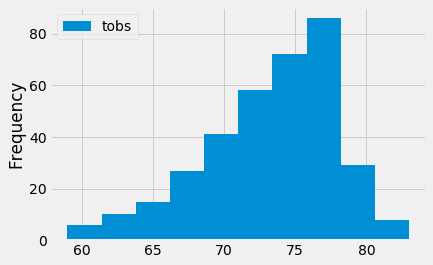

In [533]:
df2_plot=df2.plot.hist()

In [534]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [535]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

print(year_prior)
print(last_date)

TMIN=calc_temps(year_prior, last_date)[0][0]
TAVE=calc_temps(year_prior, last_date)[0][1]
TMAX=calc_temps(year_prior, last_date)[0][2] 

print(TMIN)
print(TAVE)
print(TMAX)

2016-08-23
2017-08-23
58.0
74.59058295964125
87.0


<function matplotlib.pyplot.show(*args, **kw)>

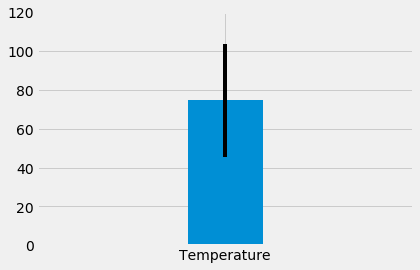

In [536]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.bar('Temperature', height=TAVE,width=0.8, yerr=(TMAX-TMIN))
plt.ylim(0,120)
plt.margins(2)

plt.show

In [537]:
#Variable Types for the Station Class
columns=inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [538]:
#Sample from Station
engine.execute('Select * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [577]:
d1=dt

station_amounts=session.query(Station.name, Station.latitude, Station.longitude, Station.station, func.sum(Measurement.prcp), ).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= year_prior).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()

station_amounts

[('MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  'USC00516128',
  147.81000000000006),
 ('WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  'USC00519281',
  70.03000000000003),
 ('KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  'USC00513117',
  48.510000000000026),
 ('WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  'USC00519523',
  38.01),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  'USC00514830',
  33.239999999999995),
 ('WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  'USC00519397',
  16.089999999999986),
 ('PEARL CITY, HI US', 21.3934, -157.9751, 'USC00517948', 4.59)]

In [539]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


tmin       tavg  tmax
date                             
2018-01-01  62.0  69.153846  77.0
2018-01-02  60.0  69.396226  77.0
2018-01-03  62.0  68.909091  77.0
2018-01-04  58.0  70.000000  76.0
2018-01-05  56.0  67.964286  76.0

<IPython.core.display.Javascript object>


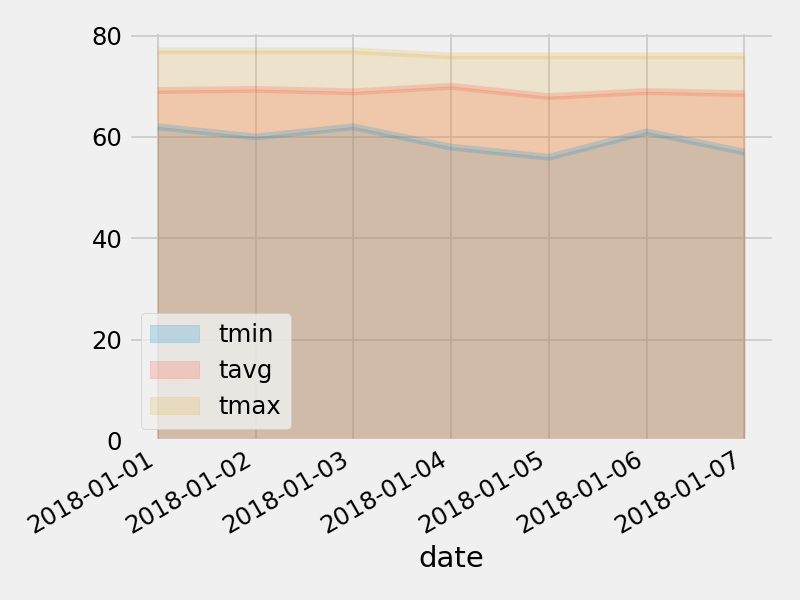

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
